In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
train = pd.read_csv('D:/Code/intensiv/data/train.csv', low_memory=False) 


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [4]:
train.duplicated().sum()

np.int64(0)

In [5]:
train = train.drop_duplicates(subset=["client_id"]) 
train

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2023-01-01,8294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6868510.0,6868510.0,6868510.0,NaN,NaN,NaN,6868510.0,6868510.0,6868510.0,0.258007
14431,2022-10-01,4919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300000.0,3300000.0,3300000.0,NaN,NaN,NaN,3300000.0,3300000.0,3300000.0,0.257217
14446,2022-10-01,8302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8577000.0,8577000.0,8577000.0,NaN,NaN,NaN,8577000.0,8577000.0,8577000.0,0.280148


In [6]:
# Шаг 1: Найти колонки с типом данных object
object_columns = train.select_dtypes(include=['object']).columns
print(f"Колонки с типом данных 'object': {list(object_columns)}")

# Шаг 2: Посчитать количество уникальных значений в каждой колонке
for col in object_columns:
    print(f"\nКолонка: {col}")
    print(f"Количество уникальных значений: {train[col].nunique()}")
    print(f"Примеры значений: {train[col].unique()[:5]}")  # Пример первых 5 уникальных значений


Колонки с типом данных 'object': ['report_date', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57', 'col58', 'col59', 'col60', 'col61', 'col62', 'col63', 'col64', 'col85', 'col86', 'col87', 'col88', 'col89', 'col90', 'col91', 'col92', 'col93', 'col94', 'col95', 'col96', 'col97', 'col98', 'col99', 'col100', 'col129', 'col130', 'col131', 'col132', 'col133', 'col134', 'col135', 'col136', 'col137', 'col138', 'col139', 'col140', 'col141', 'col142', 'col143', 'col144', 'col145', 'col146', 'col147', 'col148', 'col149', 'col150', 'col151', 'col152', 'col153', 'col154', 'col155', 'col156', 'col157', 'col158', 'col159', 'col160', 'col161', 'col162', 'col163', 'col164', 'col165', 'col166', 'col167', 'col168', 'col169', 'col170', 'col171', 'col172', 'col173', 'col174', 'col175', 'col176', 'col181', 'col182', 'col183', 'col184', 'col185', 'col186', 'col187', 'col188', 'col189', 'col190', 'col191', 'col192', 'col193', 'col194', 'col195', 'col196', 'col201', 'col202', 'c

In [7]:
train

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2023-01-01,8294,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6868510.0,6868510.0,6868510.0,NaN,NaN,NaN,6868510.0,6868510.0,6868510.0,0.258007
14431,2022-10-01,4919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300000.0,3300000.0,3300000.0,NaN,NaN,NaN,3300000.0,3300000.0,3300000.0,0.257217
14446,2022-10-01,8302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8577000.0,8577000.0,8577000.0,NaN,NaN,NaN,8577000.0,8577000.0,8577000.0,0.280148


In [8]:
valid = pd.read_csv('D:/Code/intensiv/data/valid.csv', low_memory=False) 


In [9]:
valid.info()

KeyboardInterrupt: 

In [34]:
valid = valid.drop_duplicates(subset=["client_id"]) 
valid

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2023-03-01,3435,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7361000.0,7361000.0,7361000.0,NaN,NaN,NaN,7361000.0,7361000.0,7361000.0,0.258811
3637,2023-04-01,4366,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,3500000.0,3500000.0,0.256261
3638,2023-04-01,8298,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3640,2023-03-01,8300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


In [35]:
# Шаг 1: Найти колонки с типом данных object
object_columns = valid.select_dtypes(include=['object']).columns
print(f"Колонки с типом данных 'object': {list(object_columns)}")

# Шаг 2: Посчитать количество уникальных значений в каждой колонке
for col in object_columns:
    print(f"\nКолонка: {col}")
    print(f"Количество уникальных значений: {valid[col].nunique()}")
    print(f"Примеры значений: {valid[col].unique()[:5]}")  # Пример первых 5 уникальных значений

Колонки с типом данных 'object': ['report_date', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57', 'col58', 'col59', 'col60', 'col61', 'col62', 'col63', 'col64', 'col85', 'col86', 'col87', 'col88', 'col89', 'col90', 'col91', 'col92', 'col93', 'col94', 'col95', 'col96', 'col97', 'col98', 'col99', 'col100', 'col129', 'col130', 'col131', 'col132', 'col133', 'col134', 'col135', 'col136', 'col138', 'col139', 'col140', 'col142', 'col143', 'col144', 'col145', 'col146', 'col147', 'col148', 'col149', 'col150', 'col151', 'col152', 'col153', 'col154', 'col155', 'col156', 'col157', 'col158', 'col159', 'col160', 'col161', 'col162', 'col163', 'col164', 'col165', 'col166', 'col167', 'col168', 'col170', 'col171', 'col172', 'col173', 'col174', 'col175', 'col176', 'col181', 'col182', 'col183', 'col184', 'col185', 'col186', 'col187', 'col188', 'col189', 'col190', 'col191', 'col192', 'col193', 'col194', 'col195', 'col196', 'col201', 'col202', 'col203', 'col204', 'col205', 'c

In [36]:
valid

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2023-03-01,3435,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7361000.0,7361000.0,7361000.0,NaN,NaN,NaN,7361000.0,7361000.0,7361000.0,0.258811
3637,2023-04-01,4366,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,3500000.0,3500000.0,0.256261
3638,2023-04-01,8298,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3640,2023-03-01,8300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


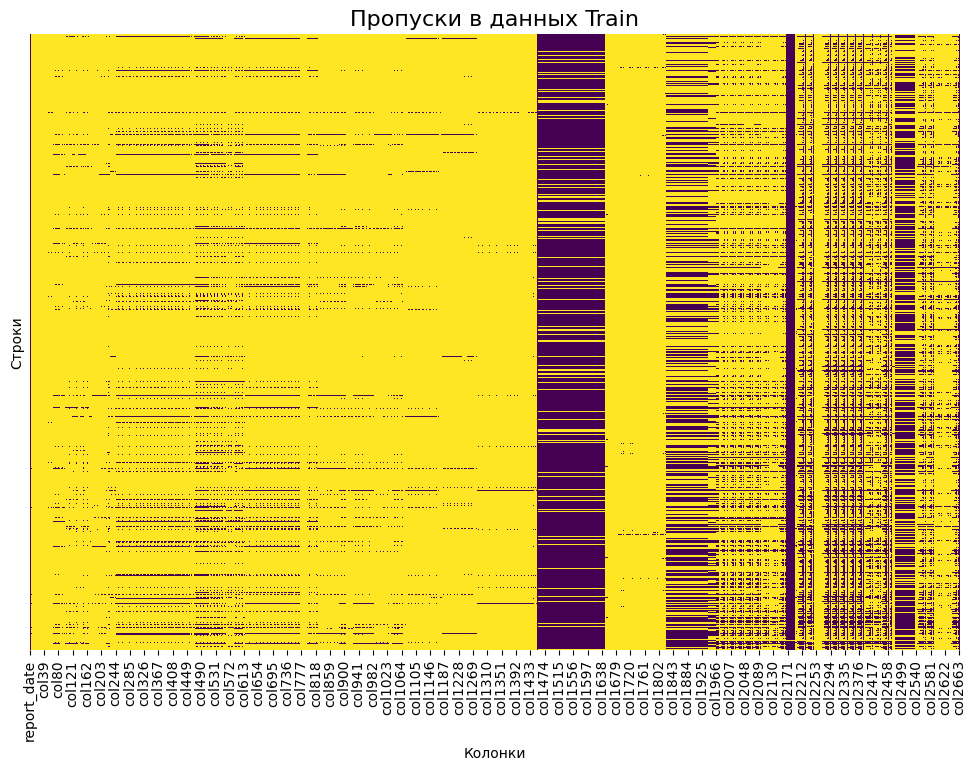

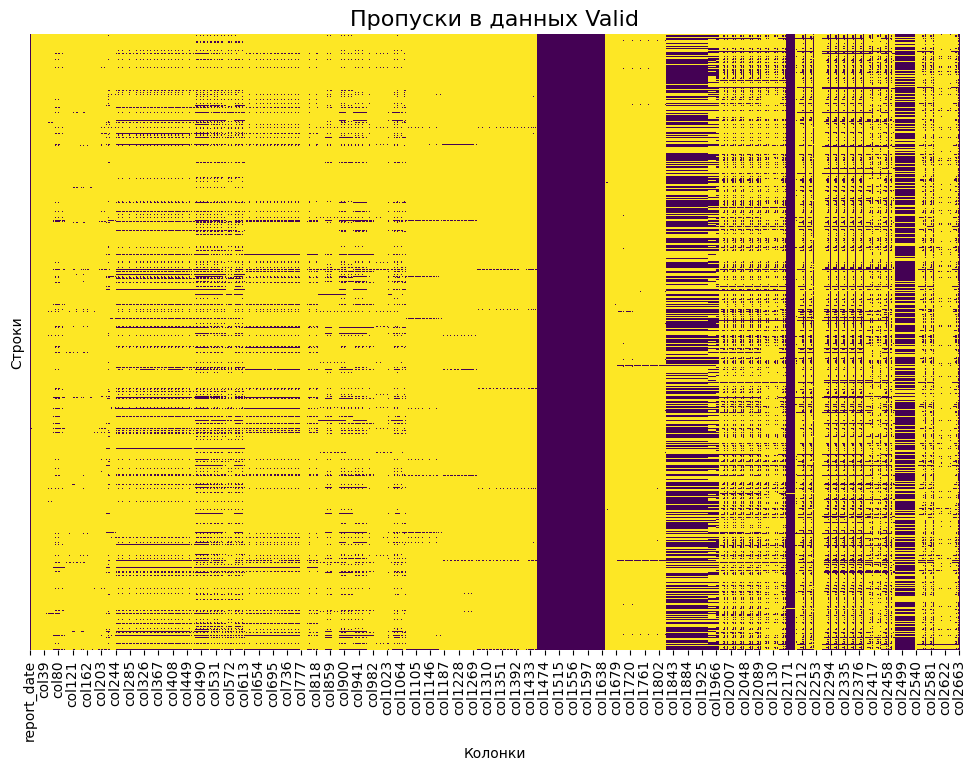

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train.isnull().mean()
valid_missing_fraction = valid.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в train
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Train", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в valid
plt.figure(figsize=(12, 8))
sns.heatmap(valid.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Valid", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()


In [38]:
threshold = 0.7

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train.isnull().mean()
valid_missing_fraction = valid.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Определяем колонки для удаления, где доля пропусков больше threshold в обоих наборах данных
columns_to_drop = combined_missing_fraction[combined_missing_fraction > threshold].index

# Удаляем колонки с большим количеством пропусков
train_cleaned = train.drop(columns=columns_to_drop)
valid_cleaned = valid.drop(columns=columns_to_drop)

# Проверяем, совпадают ли структуры после удаления колонок с пропусками
if sorted(train_cleaned.columns) != sorted(valid_cleaned.columns):
    raise ValueError("Структуры train и valid не совпадают после удаления колонок с пропусками!")
else:
    print("Структуры train и valid совпадают после удаления колонок с пропусками.")

# --- Дополнительная чистка: удаление колонок с данными разных типов ---
# Функция для проверки наличия одновременно float и object
def has_mixed_types(column):
    types = set(column.dropna().map(type))  # Собираем все типы в колонке, игнорируя NaN
    return float in types and str in types

# Определяем колонки с разными типами данных
mixed_type_columns_train = [col for col in train_cleaned.columns if has_mixed_types(train_cleaned[col])]
mixed_type_columns_valid = [col for col in valid_cleaned.columns if has_mixed_types(valid_cleaned[col])]

# Удаляем эти колонки из обоих наборов данных
columns_to_drop_mixed = set(mixed_type_columns_train).union(mixed_type_columns_valid)
train_cleaned = train_cleaned.drop(columns=columns_to_drop_mixed)
valid_cleaned = valid_cleaned.drop(columns=columns_to_drop_mixed)

# Проверяем, совпадают ли структуры после дополнительной чистки
if sorted(train_cleaned.columns) != sorted(valid_cleaned.columns):
    raise ValueError("Структуры train и valid не совпадают после удаления колонок с разными типами данных!")
else:
    print("Структуры train и valid теперь совпадают после удаления колонок с разными типами данных.")

# Сохраняем обработанные данные в новые файлы
train_cleaned.to_csv('train_cleaned.csv', index=False)
valid_cleaned.to_csv('valid_cleaned.csv', index=False)

print("Обработанные файлы сохранены как 'train_cleaned.csv' и 'valid_cleaned.csv'.")

Структуры train и valid совпадают после удаления колонок с пропусками.
Структуры train и valid теперь совпадают после удаления колонок с разными типами данных.
Обработанные файлы сохранены как 'train_cleaned.csv' и 'valid_cleaned.csv'.


In [39]:
# Заполнение пропущенных значений
for col in valid_cleaned.columns:
    if valid_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        valid_cleaned[col].fillna(valid[col].median(), inplace=True)
    elif valid_cleaned[col].dtype == 'object':  # Если колонка текстовая
        valid_cleaned[col].fillna('unknown', inplace=True)

C:\Users\adida\AppData\Local\Temp\ipykernel_5392\3867734982.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_cleaned[col].fillna('unknown', inplace=True)
C:\Users\adida\AppData\Local\Temp\ipykernel_5392\3867734982.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [40]:
# Заполнение пропущенных значений
for col in train_cleaned.columns:
    if train_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        train_cleaned[col].fillna(train[col].median(), inplace=True)
    elif train_cleaned[col].dtype == 'object':  # Если колонка текстовая
        train_cleaned[col].fillna('unknown', inplace=True)

C:\Users\adida\AppData\Local\Temp\ipykernel_5392\2322085890.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cleaned[col].fillna('unknown', inplace=True)
C:\Users\adida\AppData\Local\Temp\ipykernel_5392\2322085890.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [41]:
valid_cleaned.head()

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2582,col2583,col2584,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,0,08e72a9b-74fd-450a-982e-a8cede3facb3,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,300.0,300.0,300.0,6878250.0,6669184.0,6793000.0,0.256261
4,2023-03-01,14,0,0,0a033230-3889-4239-8900-0ffb7e48958c,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,362.0,362.0,362.0,10391000.0,10391000.0,10391000.0,0.257348


In [42]:
train_cleaned.head()

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2582,col2583,col2584,col2588,col2589,col2590,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,300.0,290.0,300.0,264.0,242.0,259.3,6500000.0,6435100.0,6495012.5,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,300.0,290.0,300.0,264.0,242.0,259.3,6500000.0,6435100.0,6495012.5,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,300.0,290.0,300.0,264.0,242.0,259.3,6500000.0,6435100.0,6495012.5,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,300.0,290.0,300.0,264.0,242.0,259.3,6500000.0,6435100.0,6495012.5,0.254164


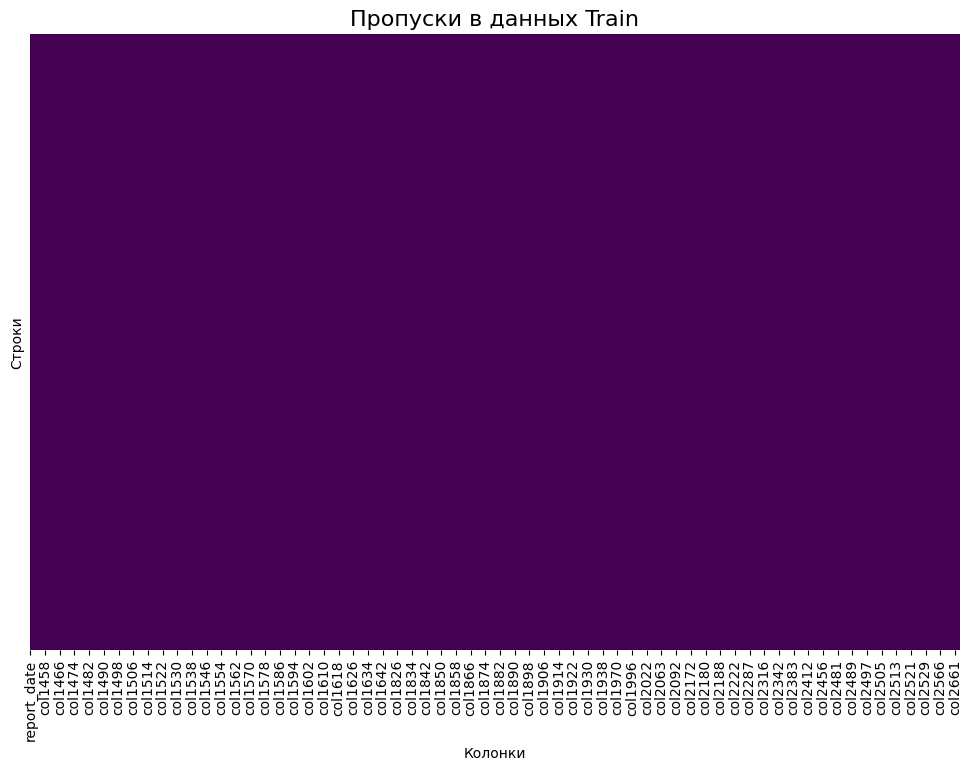

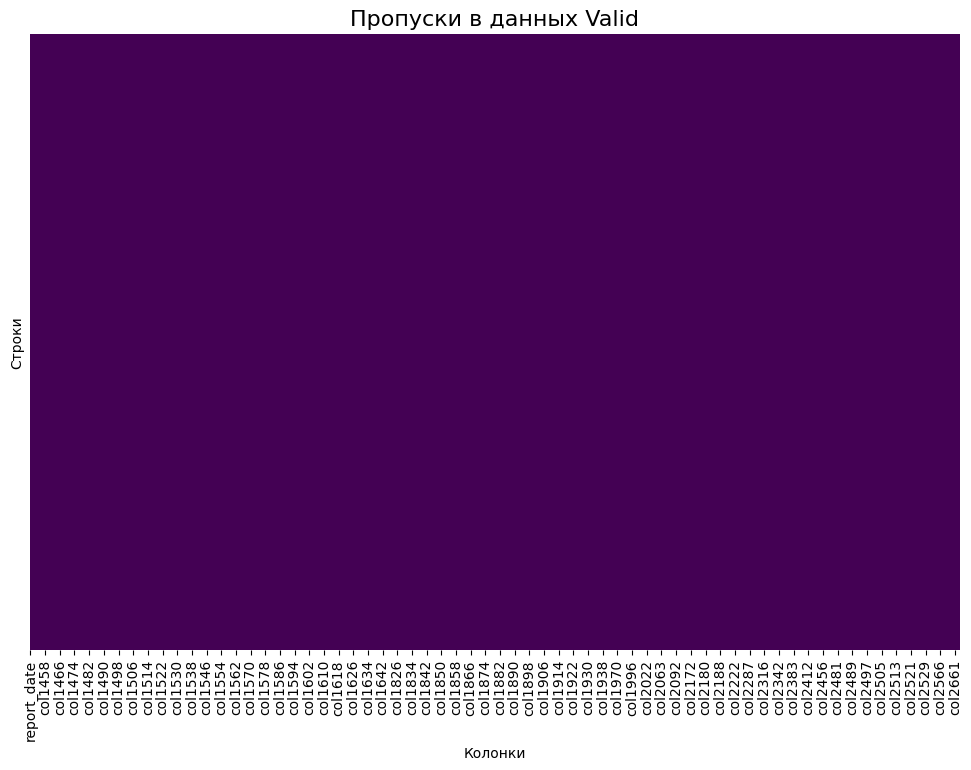

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_cleaned.isnull().mean()
valid_missing_fraction = valid_cleaned.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в train
plt.figure(figsize=(12, 8))
sns.heatmap(train_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Train", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в valid
plt.figure(figsize=(12, 8))
sns.heatmap(valid_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Valid", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



X = train_cleaned.drop(columns=['client_id', 'target', 'report_date'])
y = train_cleaned['target']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[categorical_features] = X[categorical_features].astype(str)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

test_preds = model.predict_proba(X_test)[:, 1]
test_score = roc_auc_score(y_test, test_preds)
print(f"ROC-AUC на тестовых данных: {test_score:.4f}")

submission = pd.DataFrame({'client_id': train.loc[X_test.index, 'client_id'], 'score': test_preds})
submission.to_csv('submission_file.csv', index=False)
print("Результаты сохранены в submission_file.csv")

ROC-AUC на тестовых данных: 0.7519
Результаты сохранены в submission_file.csv


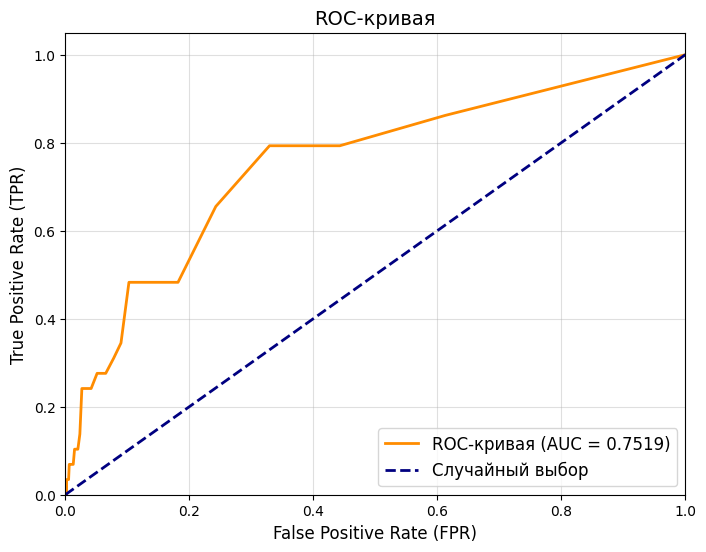

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Получение ROC-кривой и AUC
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный выбор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


In [46]:
# Отбрасываем ненужные колонки в valid_cleaned
X_valid = valid_cleaned.drop(columns=['client_id', 'report_date'])

# Преобразуем категориальные признаки в строки (если необходимо)
categorical_features_valid = X_valid.select_dtypes(include=['object', 'category']).columns
X_valid[categorical_features_valid] = X_valid[categorical_features_valid].astype(str)

# Применяем обученную модель к данным valid_cleaned
valid_preds = model.predict_proba(X_valid)[:, 1]  # Получаем вероятности для положительного класса

# Формируем DataFrame с результатами
submission_valid = pd.DataFrame({'client_id': valid_cleaned['client_id'], 'score': valid_preds})

# Сохраняем результаты в CSV
submission_valid.to_csv('submission_valid.csv', index=False)

test_preds = model.predict_proba(X_test)[:, 1]
test_score = roc_auc_score(y_test, test_preds)
print(f"ROC-AUC на тестовых данных: {test_score:.4f}")

print("Результаты для valid_cleaned сохранены в submission_valid.csv")


ROC-AUC на тестовых данных: 0.7519
Результаты для valid_cleaned сохранены в submission_valid.csv


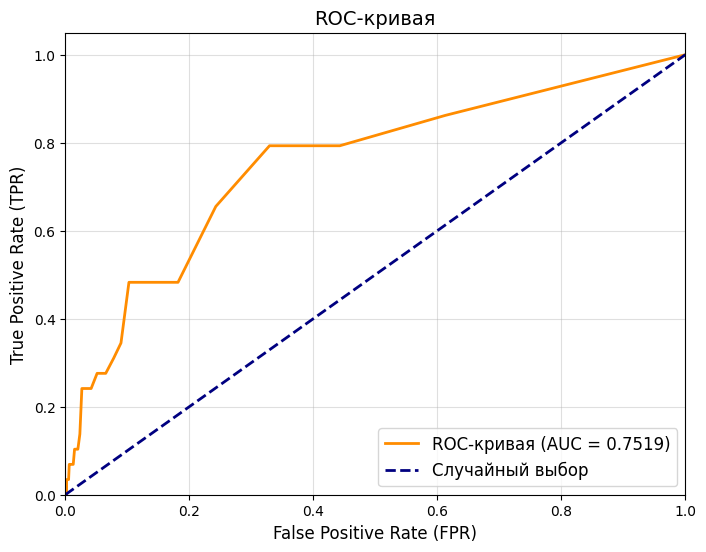

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Получение ROC-кривой и AUC
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный выбор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()
